In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
N=500
c1=0.4
c2=0.4
c3=0.2
mu1=[2,2]
mu2=[-2,-2]
mu3=[5.5,2]
s1=[[1,0.1],[0.1,1]]
s2=[[1,-0.1],[-0.1,1]]
s3=[[1,0.2],[0.2,0.5]]

In [28]:
X1=np.random.multivariate_normal(mu1,s1,[int(N*c1)])
X2=np.random.multivariate_normal(mu2,s2,[int(N*c2)])
X3=np.random.multivariate_normal(mu3,s3,[int(N*c3)])
X1X2=np.concatenate((X1,X2),axis=0)
new_data=np.concatenate((X1X2,X3),axis=0)

m=np.array(new_data).shape[0]
m=int(m)
m

500

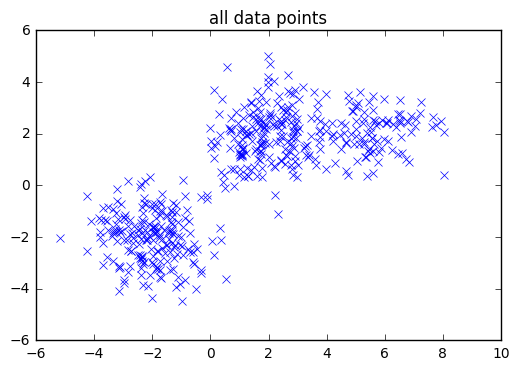

In [29]:
plt.plot(new_data[:,0],new_data[:,1],'x')
plt.title('all data points')
plt.show()


In [30]:
pi1,pi2,pi3=1/3.0,1/3.0,1/3.0
R1,R2,R3=[[1.0,0.0],[0.0,1.0]],[[1.0,0.0],[0.0,1.0]],[[1.0,0.0],[0.0,1.0]]
m1,m2,m3=[2.0,2.0],[-2.0,-2.0],[5.5,2.0]
pi=[pi1,pi2,pi3]
R=[R1,R2,R3]
m=[m1,m2,m3]
c=3
np.matrix(R1)

matrix([[ 1.,  0.],
        [ 0.,  1.]])

In [31]:

labels=np.zeros(len(new_data))
for it in range(20):
    for i in range(len(new_data)):
        collection=[]
        for k in range(c):
            norm=1.0/np.linalg.det(R[k])
            value=pi[k]*norm*np.exp(-0.5*np.matrix(new_data[i]-m[k])*np.linalg.inv(np.matrix(R[k]))*np.matrix(new_data[i]-m[k]).T)
            collection.append(np.abs(value))
        myvalue=np.squeeze(collection)
        center=np.argwhere(myvalue==np.max(myvalue))
        labels[i]=center[0]
        
    for k in range(c):
        value=labels==k
        Number=np.sum(value)
        data_value=new_data[value]
        pi[k]=Number/500.0
        m[k]=np.sum(data_value,axis=0)/Number
        all_sigma=[]
        for sig in range(Number):
            sigma=np.matrix((data_value[sig]-(m[k==c]))).T*np.matrix((data_value[sig]-(m[k==c])))
            all_sigma.append(sigma)
        R[k]=np.sum(all_sigma,axis=0)/Number
        
        
        
    

In [37]:
h=0.2
H=5
x_min, x_max = -10-H,10+H
y_min, y_max = -10-H,10+H
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z=np.c_[xx.ravel(),yy.ravel()]
mm=(xx.ravel()).shape
mm=int(np.array(mm))

In [38]:
N_mu1=m[0]
N_mu2=m[1]
N_mu3=m[2]
N_s1=R[0]
N_s2=R[1]
N_s3=R[2]

In [39]:
all_value1=[]
all_value2=[]
all_value3=[]
for i in range(mm):
    value1=(np.matrix(Z[i]-N_mu1))*np.linalg.inv(N_s1)*(np.matrix(Z[i]-N_mu1)).T
    all_value1.append(value1)
    value2=(np.matrix(Z[i]-N_mu2))*np.linalg.inv(N_s2)*(np.matrix(Z[i]-N_mu2)).T
    all_value2.append(value2)
    value3=(np.matrix(Z[i]-N_mu3))*np.linalg.inv(N_s3)*(np.matrix(Z[i]-N_mu3)).T
    all_value3.append(value3)

In [40]:
all_value1=np.squeeze(all_value1)
all_value2=np.squeeze(all_value2)
all_value3=np.squeeze(all_value3)

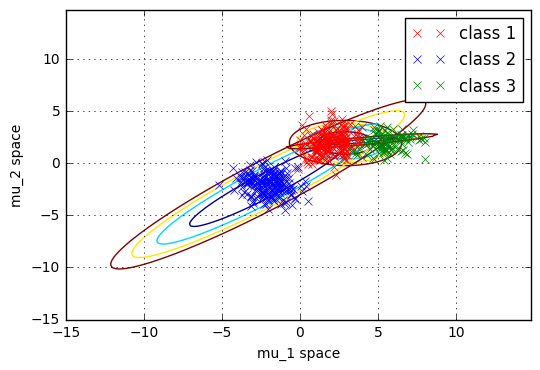

In [41]:
Z1 = all_value1.reshape(xx.shape)
plt.contour(xx,yy, Z1,levels=[1,2,3,4])
Z2 = all_value2.reshape(xx.shape)
plt.contour(xx,yy, Z2,levels=[1,2,3,4])
Z3 = all_value3.reshape(xx.shape)
plt.contour(xx,yy, Z3,levels=[1,2,3,4])
plt.plot(X1[:,0],X1[:,1],'rx',label='class 1')
plt.plot(X2[:,0],X2[:,1],'bx',label='class 2')
plt.plot(X3[:,0],X3[:,1],'gx',label='class 3')
plt.legend()
plt.grid()
plt.xlabel('mu_1 space')
plt.ylabel('mu_2 space')

plt.show()